In [ ]:
import pandas as pd
import loader as load
# aak_ge = load.loadGEWithClinical()

In [ ]:
import processor as pr

tcma_cancer_type = ["COAD", "ESCA", "HNSC", "READ", "STAD"]

data = [load.loadTCMA("genus"), load.loadTCMA("phylum"), aak_ge, load.loadGEOverlappingTCMA("genus"), load.loadGEOverlappingTCMA("phylum")]
source_types = ["GENUS", "PHYLUM", "GE", "GENUS n GE", "PHYLUM n GE"]
file_names = ["TCMA_Genus", "TCMA_Phylum", "TCGA_GE(Aakash)", "TCMA_Genus_GE(Aakash)_Overlap", "TCMA_Phylum_GE(Aakash)_Overlap"]
reduction_type = "TSNE"
for i, b in enumerate(data):
    X, Y, titles = [], [], []
    b = load.attachTumorStatus(b)
    for c in tcma_cancer_type:
        x, y = pr.splitData(b, "tumor", project=c)
        if reduction_type == "PCA":
            X.append(pr.getPCA(x))
        else:
            X.append(pr.getTSNE(x))
        Y.append(y)
        titles.append(f"{c} {source_types[i]} {reduction_type}")
    pr.plotScatter(X, Y, titles, f"Visual/{reduction_type}/{file_names[i]}")


In [ ]:
target = "tumor"
files = ['aak_ge', 'tcma_gen', 'tcma_gen_aak_ge']
data = [pd.read_csv(fr"Data\Descriptor\Prediction_Tables\{target}\{x}_pred.csv", index_col=None) for x in files]
data[0].head(5)
data[2]["cancer"].nunique()

['COAD' 'ESCA' 'HNSC' 'STAD']


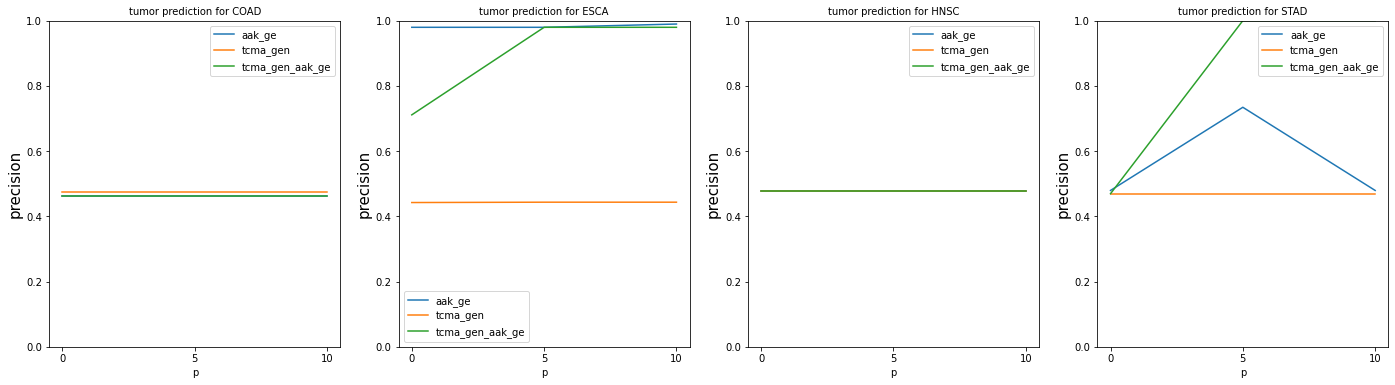

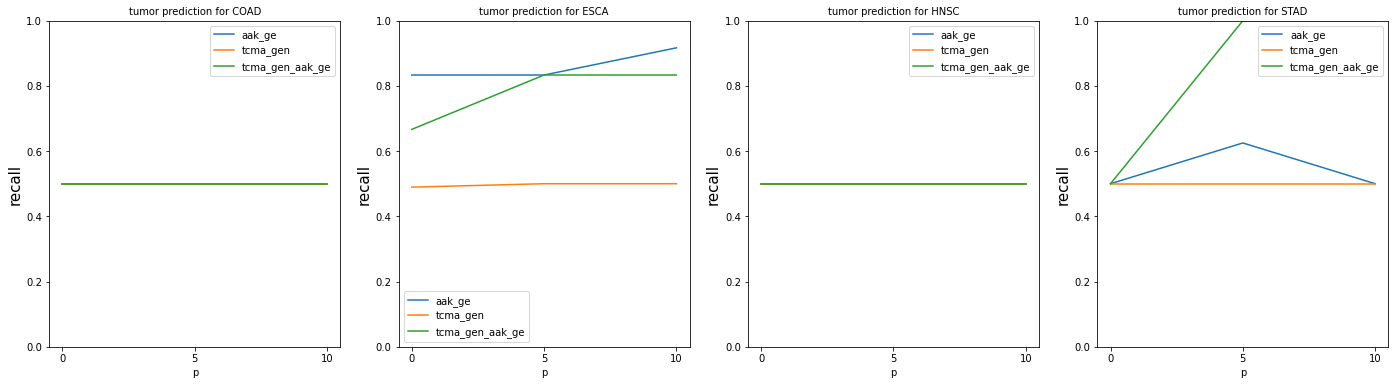

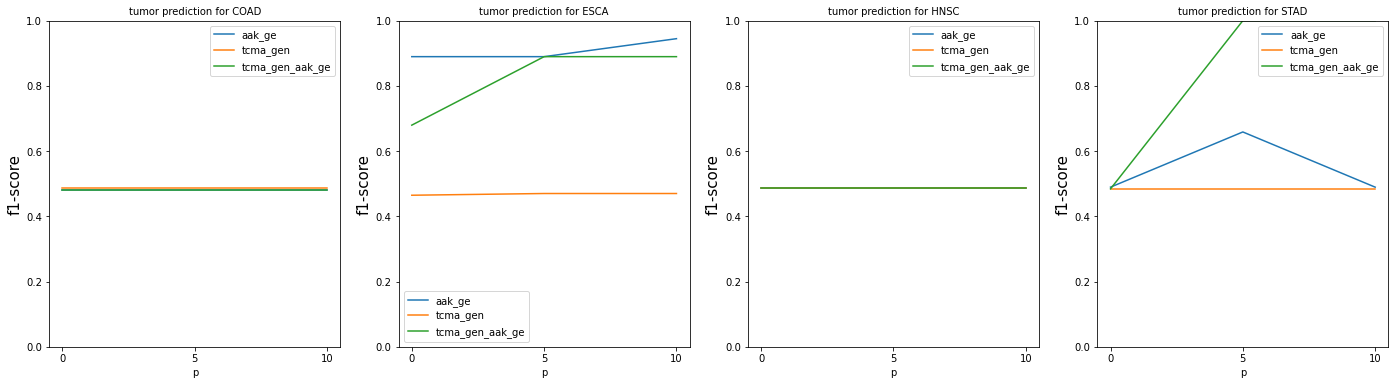

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# fig, ax = plt.subplots()

print(data[0].cancer.unique())
for metric in ["precision", "recall", "f1-score"]:
    fig = plt.figure(figsize = (24, 6))
    for i, cancer in enumerate(data[0].cancer.unique()):
        ax = fig.add_subplot(1,4,(i+1)) 
        ax.set_title(f"{target} prediction for {cancer}", fontsize = 10)
        ax.set_ylabel(metric, fontsize = 15)
            

        for j, d in enumerate(data):
            # d["balanced_accuracy"] = d[""]
            d = d[[metric, "cancer", "p"]]
            d = d[d.cancer == cancer]
            feature_amounts = d.p.unique()
            line = d.plot(kind="line", x="p", y=metric, ax=ax, label=files[j], xticks=feature_amounts, ylim=(0, 1))
    filename = f"Visual/prediction/{target}_{metric}.png"
    plt.savefig(filename, transparent=False, facecolor="white")
